In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

USER = os.getenv('USER')

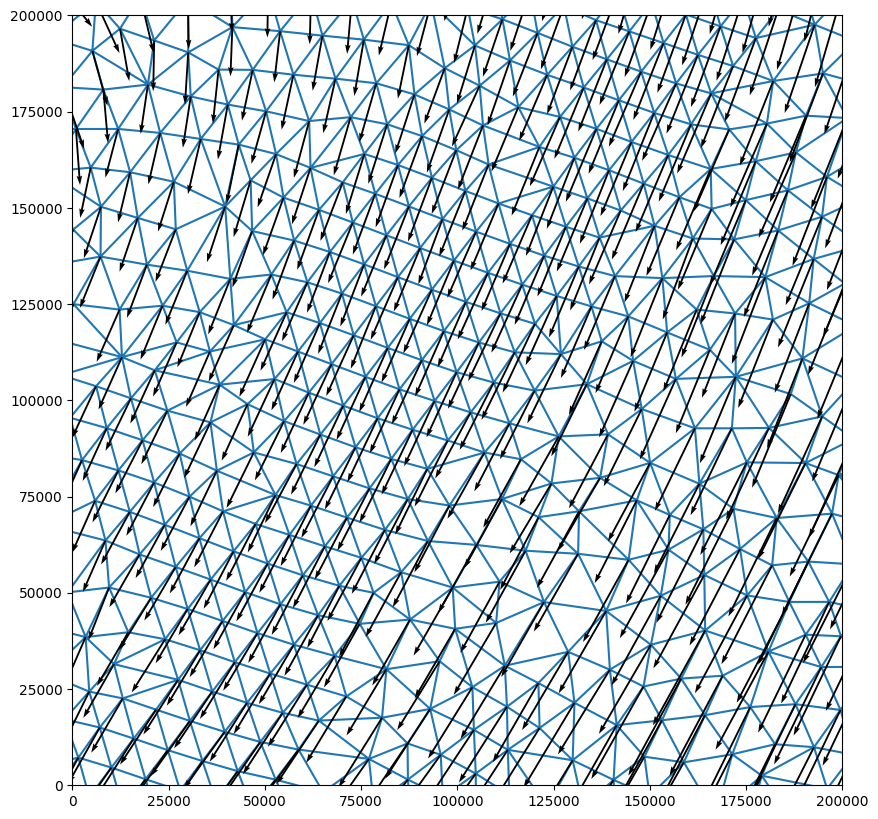

In [2]:
# PLOT TRIANGULATION and SEA ICE DRIFT at ONE MODEL STEP

# file with converted node and element variables
nfile0 = f'../data/field_20230101T120000Z.npz'

# load data into one dict
d0 = dict(np.load(nfile0))

plt.figure(figsize=(10,10))

# x, y are coordinates of nodes
# t - trinagulation, indeces of nodes for each element
plt.triplot(d0['x'], d0['y'], d0['t'])

# plot M_VT_x, M_VT_y are drift components for each NODE
plt.quiver(d0['x'], d0['y'], d0['M_VT_x'], d0['M_VT_y'], scale=1)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

In [5]:
d0.keys()

dict_keys(['Damage', 'Concentration', 'Thickness', 'Sigma_0', 'Sigma_1', 'M_VT_x', 'M_VT_y', 'M_wind_x', 'M_wind_y', 'M_ocean_x', 'M_ocean_y', 'x', 'y', 't', 'i'])

In [10]:
for i,key in d0.items():
    print(i,key.shape)

Damage (137736,)
Concentration (137736,)
Thickness (137736,)
Sigma_0 (137736,)
Sigma_1 (137736,)
M_VT_x (70886,)
M_VT_y (70886,)
M_wind_x (70886,)
M_wind_y (70886,)
M_ocean_x (70886,)
M_ocean_y (70886,)
x (70886,)
y (70886,)
t (137736, 3)
i (70886,)


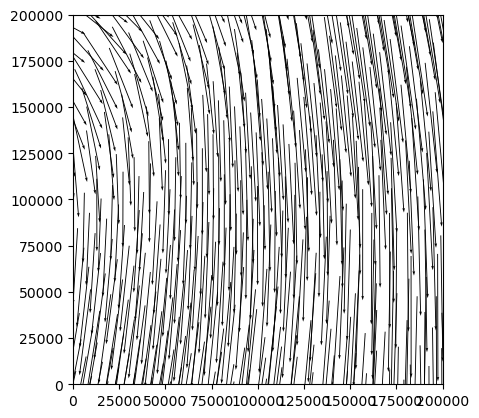

In [6]:
# plot wind speed
plt.quiver(d0['x'], d0['y'], d0['M_wind_x'], d0['M_wind_y'], scale=20)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

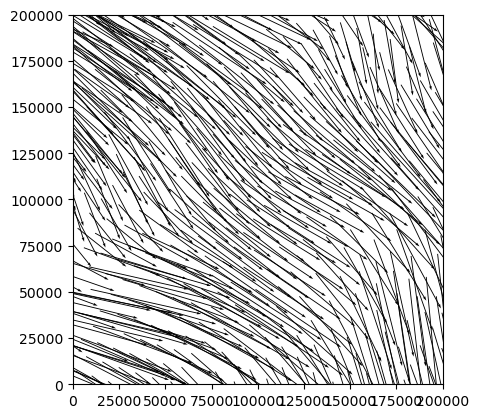

In [7]:
# plot ocean current (notice much smaller scale)
plt.quiver(d0['x'], d0['y'], d0['M_ocean_x'], d0['M_ocean_y'], scale=0.1)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

In [20]:
d0['M_ocean_x'].shape

(70886,)

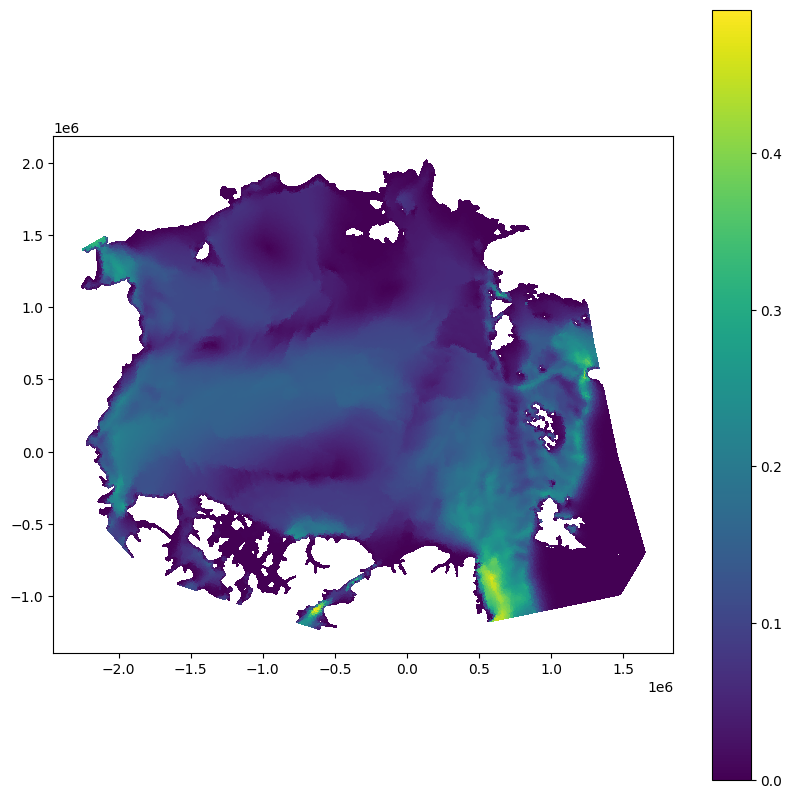

In [8]:
# plot sea ice concentration (for each ELEMENT)
vel_norm = np.sqrt(d0['M_VT_x']**2 + d0['M_VT_y']**2)

plt.figure(figsize=(10,10))
plt.tripcolor(d0['x'], d0['y'], vel_norm, triangles=d0['t'])
plt.colorbar()
plt.gca().set_aspect('equal')

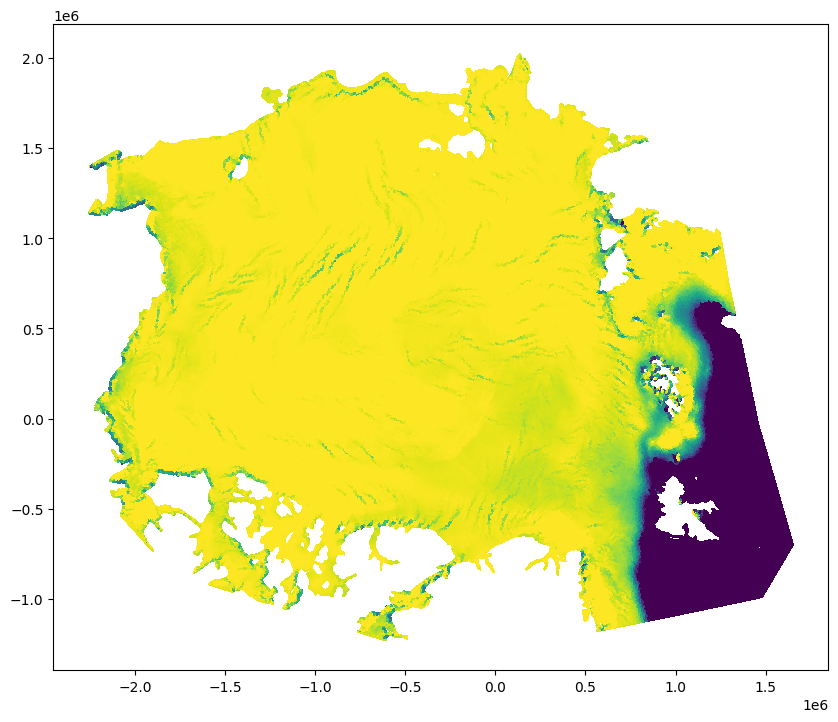

In [4]:
# plot sea ice concentration (for each ELEMENT)
plt.figure(figsize=(10,10))
plt.tripcolor(d0['x'], d0['y'], d0['Concentration'], triangles=d0['t'], vmin=0.5, vmax=1.0)
plt.gca().set_aspect('equal')

(0.0, 200000.0)

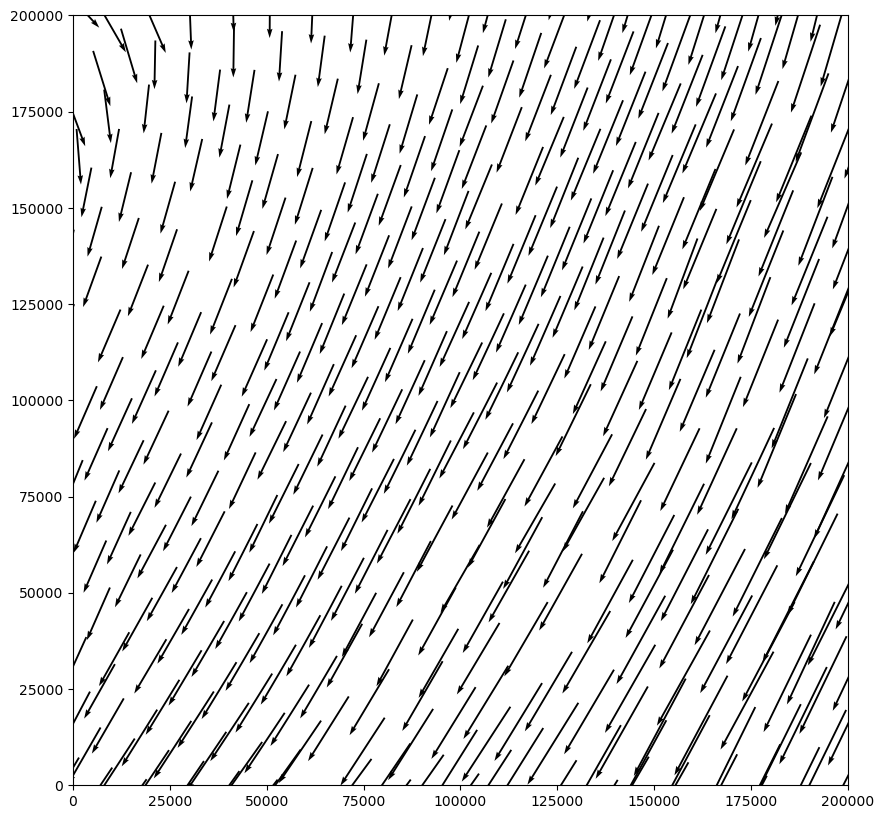

In [10]:
# COMPUTE DRIFT BETWEEN TWO SNAPSHOTS
# Not all the nodes survive - some are removed because of ice convergence and lements becomsing too small.
# Most of the nodes persist, but also new nodes may appear.


# OPEN THE SECOND FILE (output ONE HOUR LATER)
# file with converted node and element variables
nfile1 = f'data/field_20230101T130000Z.npz'

# load data into one dict from the 
d1 = dict(np.load(nfile1))

# find common nodes on the first and the second files
_, comm0, comm1 = np.intersect1d(d0['i'], d1['i'], assume_unique=True, return_indices=True)

# get common X, Y coordinates
x0 = d0['x'][comm0]
y0 = d0['y'][comm0]
x1 = d1['x'][comm1]
y1 = d1['y'][comm1]

# compute drift [m/s] for two files separated by 1 hour
u = (x1 - x0) / (1 * 60 * 60)
v = (y1 - y0) / (1 * 60 * 60)

plt.figure(figsize=(10,10))
plt.quiver(x0, y0, u, v, scale=1)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])